In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import Video

# np.set_printoptions(threshold=np.inf)
%matplotlib notebook

In [2]:
img_path = 'bangkok.jpg'
img_resizing_factor = 1

In [3]:
img_bgr = cv2.imread(img_path)
img_bgr_resize = cv2.resize(img_bgr,(img_bgr.shape[1]//img_resizing_factor,img_bgr.shape[0]//img_resizing_factor))
img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)
img_gray.shape

(620, 620)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa350550890>,
 <matplotlib.image.AxesImage at 0x7fa350477b50>)

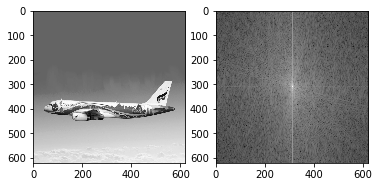

In [4]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(magnitude_spectrum, 'gray')

In [5]:
M, N = img_gray.shape
M, N

(620, 620)

In [6]:
r0 = 100
r0

100

In [7]:
ruv = lambda u,v : math.sqrt(math.pow(u - M/2, 2) + math.pow(v - N/2, 2))

In [8]:
Huv = lambda r0, u, v : 1 - math.pow(math.e,(-math.pow(ruv(u, v), 2)) / (2*math.pow(r0, 2)))

In [9]:
H = lambda r0 : [[Huv(r0, v, u) for u in range(N)] for v in range(M)]

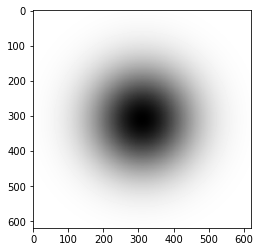

In [10]:
mask = H(r0)
plt.imshow(np.array(mask)*255, 'gray')

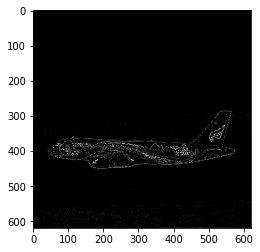

In [11]:
img_back = np.fft.ifft2(mask * fshift)
img_back = np.round(np.abs(img_back))
plt.imshow(img_back, 'gray')

## Init r0

In [12]:
step = 30
m0 = np.min(img_gray.shape)//4
r0 = np.round(np.linspace(m0/step, m0, step)).astype(np.int)
r0

array([  5,  10,  16,  21,  26,  31,  36,  41,  46,  52,  57,  62,  67,
        72,  78,  83,  88,  93,  98, 103, 109, 114, 119, 124, 129, 134,
       140, 145, 150, 155])

In [13]:
mask_list = [H(r) for r in r0]

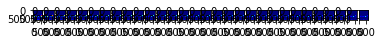

In [14]:
img_back_list = []

for i in range(len(mask_list)):
    img_back = np.fft.ifft2(mask_list[i] * fshift)
    img_back = np.round(np.abs(img_back))
    
    plt.subplot(1, len(mask_list), i+1), plt.imshow(img_back, 'jet')
    
    img_back_list.append(img_back)

## Write Video

In [15]:
filename = 'lab3-2.avi'

output = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc('M','J','P','G'), 4, (img_gray.shape[1], img_gray.shape[0]))

img_back_list = img_back_list + img_back_list[::-1]
for img in img_back_list:
    img_2d = img.astype(np.uint8)
    img_3d = cv2.applyColorMap(img_2d, cv2.COLORMAP_JET)
    output.write(img_3d)

output.release()
print("Video file creation successful!")

Video file creation successful!


In [16]:
Video(filename)